# Career Foundry 6.5 

In [1]:
#import Libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# Load Database 
df = pd.read_csv('/Users/katiejogoyal/Desktop/Career Foundry 6/6.1 Data/SS_file.csv')

In [3]:
# Show Data 
df.head()

Segment        Country             City       State  Postal Code Region  \
0   Consumer  United States        Henderson    Kentucky        42420  South   
1   Consumer  United States        Henderson    Kentucky        42420  South   
2  Corporate  United States      Los Angeles  California        90036   West   
3   Consumer  United States  Fort Lauderdale     Florida        33311  South   
4   Consumer  United States  Fort Lauderdale     Florida        33311  South   

          Category Sub-Category     Sales  Quantity  Discount   Profits  
0        Furniture    Bookcases  261.9600         2      0.00   41.9136  
1        Furniture       Chairs  731.9400         3      0.00  219.5820  
2  Office Supplies       Labels   14.6200         2      0.00    6.8714  
3        Furniture       Tables  957.5775         5      0.45 -383.0310  
4  Office Supplies      Storage   22.3680         2      0.20    2.5164

In [4]:
# Show Data Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Segment       9994 non-null   object 
 1   Country       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Postal Code   9994 non-null   int64  
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profits       9994 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 937.1+ KB
None


In [11]:
# Select relavant features for clustering 
features = df[['Profits', 'Sales']]

In [13]:
# Verify clusters
print(features.head())

    Profits     Sales
0   41.9136  261.9600
1  219.5820  731.9400
2    6.8714   14.6200
3 -383.0310  957.5775
4    2.5164   22.3680


In [21]:
# Create df_numeric 
df_numeric = df.select_dtypes(include=[np.number]) 

In [22]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


In [23]:
# Check if df_scaled was created successfully
print(df_scaled[:5]) 

[[-0.39830154  0.0515104  -0.8043034  -0.75664349  0.05659251]
 [-0.39830154  0.80563348 -0.35486486 -0.75664349  0.81505408]
 [ 1.08681691 -0.34536777 -0.8043034  -0.75664349 -0.09300169]
 [-0.68240654  1.16768814  0.5440122   1.42314932 -1.75748444]
 [-0.68240654 -0.33293544 -0.8043034   0.21215332 -0.11159307]]


In [25]:
# Use the Elbow Method with KMeans
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]
inertia = [kmeans[i].fit(df_scaled).inertia_ for i in range(len(kmeans))]

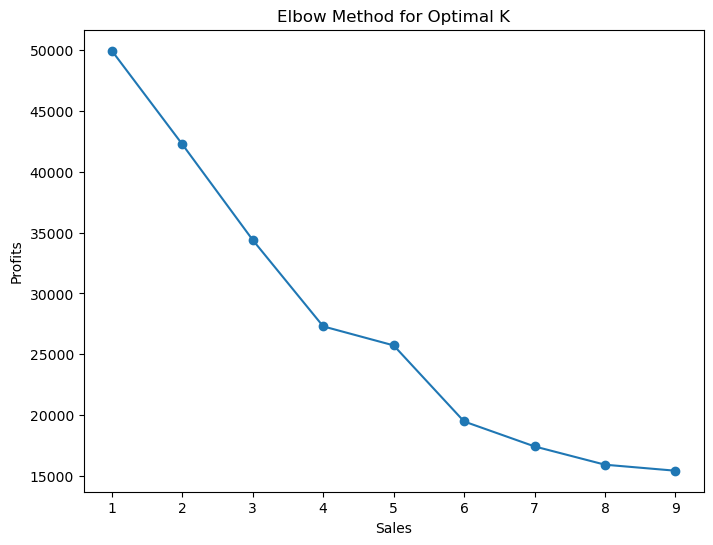

In [27]:
# Plotting the elbow method results
plt.figure(figsize=(8, 6))
plt.plot(num_cl, inertia, marker='o')
plt.xlabel('Sales')
plt.ylabel('Profits')
plt.title('Elbow Method for Optimal K')
plt.show()

# Make an informed decision about number of clusters
Based on the Elbow Method, 3 clusters appear to be the optimal choice as the sharp decline in inertia flattens after that point, indicating diminishing returns from adding more clusters.

In [28]:
# Run a K-means Algorithm
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=18, n_init=10)

In [30]:
# Add Cluster Labels 
df['Cluster'] = kmeans.fit_predict(df_scaled)
df_numeric['Cluster'] = kmeans.fit_predict(df_scaled)

In [31]:
# Check first few rows of data
print(df.head())
print(df_numeric.head())

     Segment        Country             City       State  Postal Code Region  \
0   Consumer  United States        Henderson    Kentucky        42420  South   
1   Consumer  United States        Henderson    Kentucky        42420  South   
2  Corporate  United States      Los Angeles  California        90036   West   
3   Consumer  United States  Fort Lauderdale     Florida        33311  South   
4   Consumer  United States  Fort Lauderdale     Florida        33311  South   

          Category Sub-Category     Sales  Quantity  Discount   Profits  \
0        Furniture    Bookcases  261.9600         2      0.00   41.9136   
1        Furniture       Chairs  731.9400         3      0.00  219.5820   
2  Office Supplies       Labels   14.6200         2      0.00    6.8714   
3        Furniture       Tables  957.5775         5      0.45 -383.0310   
4  Office Supplies      Storage   22.3680         2      0.20    2.5164   

   Cluster  
0        0  
1        0  
2        2  
3        1  
4  

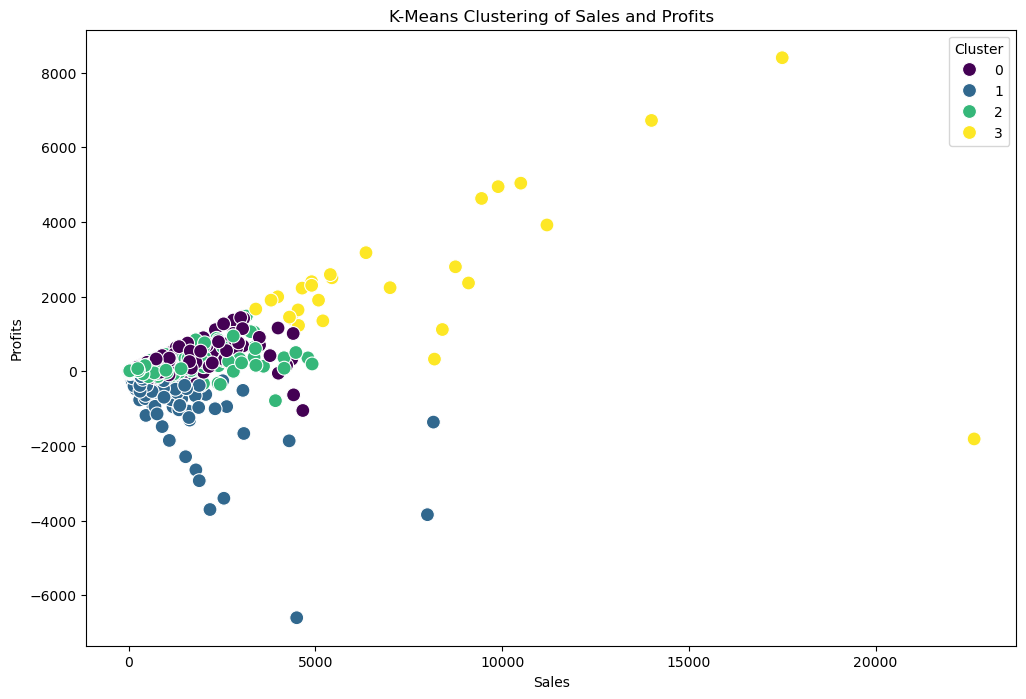

In [32]:
# Plotting the Clusters 
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Sales', y='Profits', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of Sales and Profits')
plt.xlabel('Sales')
plt.ylabel('Profits')
plt.legend(title='Cluster')
plt.show()

In [38]:
# Example 'top_conditions' for your dataset 
top_conditions = ['Furniture', 'Office Supplies', 'Technology']  

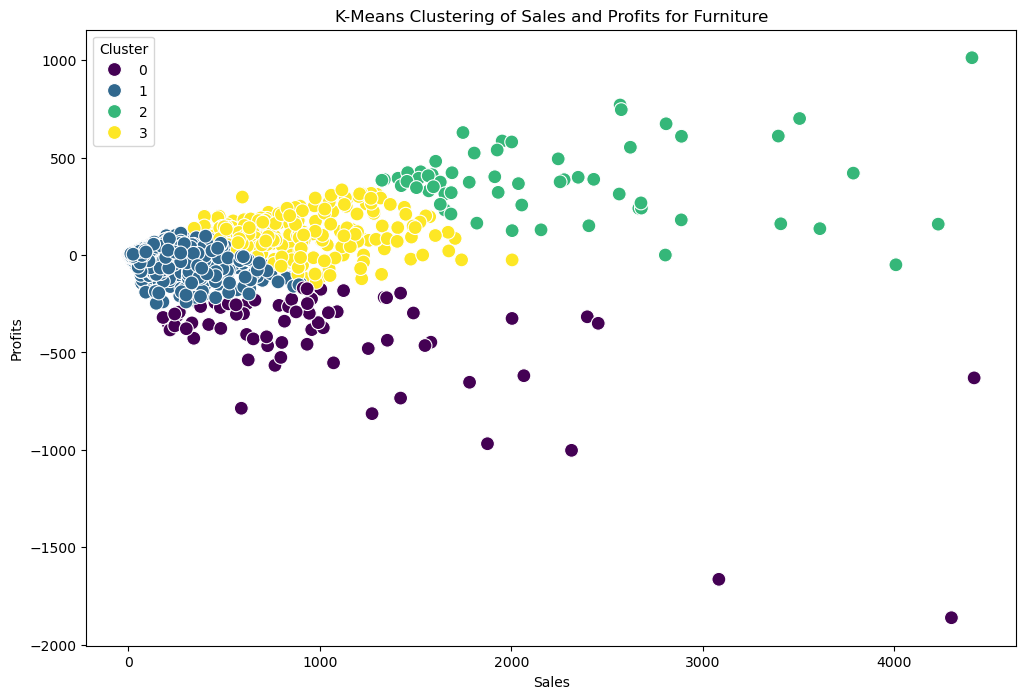

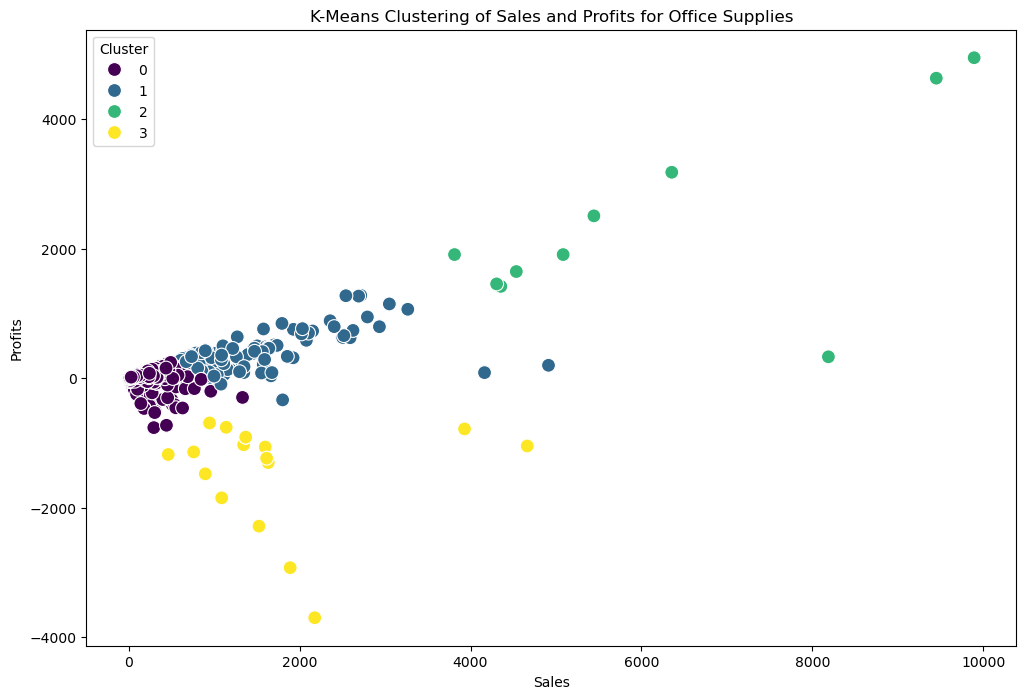

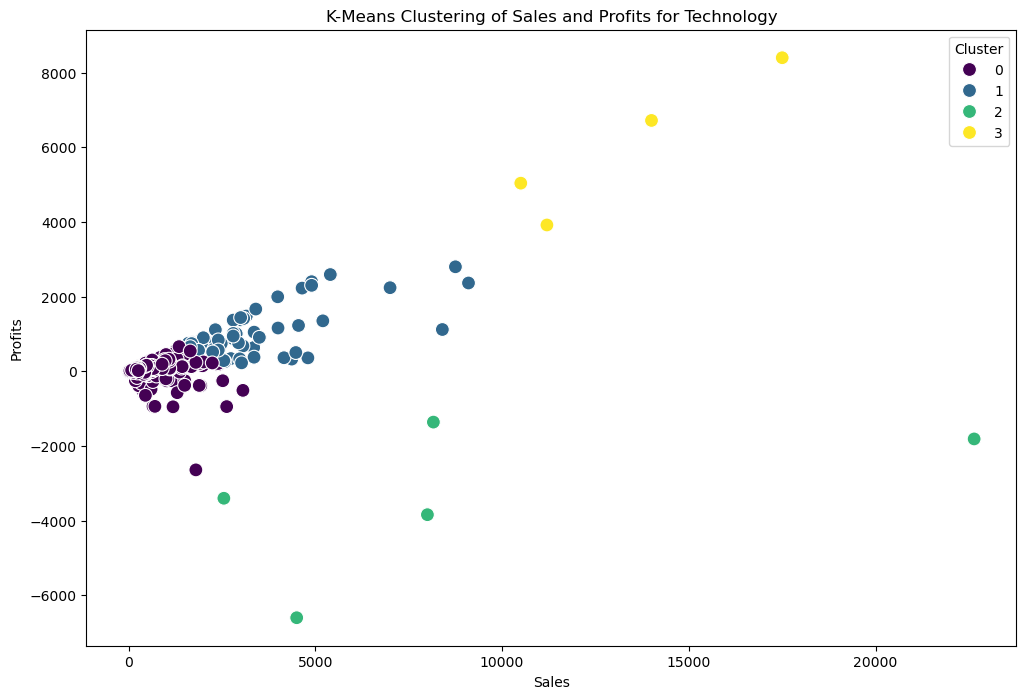

In [39]:

# Running K-means clustering and creating scatterplots
for condition in top_conditions:
    # Filter the dataset 
    df_condition = df[df['Category'] == condition].copy()
    
    # Select relevant features for clustering 
    features_condition = df_condition[['Sales', 'Profits']]  
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_features_condition = scaler.fit_transform(features_condition)
             
    # Run K-Means algorithm 
    optimal_clusters = 4  
    kmeans_condition = KMeans(n_clusters=optimal_clusters, random_state=18, n_init=10)
    df_condition.loc[:, 'Cluster'] = kmeans_condition.fit_predict(scaled_features_condition)
        
    # Scatterplot 
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_condition, x='Sales', y='Profits', hue='Cluster', palette='viridis', s=100)
    plt.title(f'K-Means Clustering of Sales and Profits for {condition}')
    plt.xlabel('Sales')
    plt.ylabel('Profits')
    plt.legend(title='Cluster')
    plt.show()
        

# Discuss the Clusters 
The scatter plots show 4 distinct clusters from a K-means analysis, likely based on Sales and Profits, with purple representing negative profits (losses), yellow showing moderate profits, teal indicating higher sales and positive profits, and green representing high-value transactions with the highest sales and profits. These clusters provide valuable insights for business decisions, such as targeting profitable segments (green and teal) and addressing unprofitable ones (purple).


In [40]:
# Descriptive stats for clusters
cluster_stats = df_numeric.groupby('Cluster').agg(['count', 'mean', 'std', 'min', 'max'])
print(cluster_stats)

        Postal Code                                           Sales  \
              count          mean           std    min    max count   
Cluster                                                               
0              4517  25514.238875  15349.896168   1040  59405  4517   
1              1045  55366.609569  23021.243911  10011  97756  1045   
2              4405  85705.719183  11075.982831  57103  99301  4405   
3                27  34556.851852  30747.083336   2908  98115    27   

                                                        ... Discount  \
                mean          std       min        max  ...    count   
Cluster                                                 ...            
0         211.853062   420.181709     1.240   4663.736  ...     4517   
1         179.695207   537.002258     0.444   8159.952  ...     1045   
2         214.524233   411.580001     0.990   4912.590  ...     4405   
3        7685.179259  4520.832517  3404.500  22638.480  ...       27  

# Interpreation of Descriptive Statistics 
Clusters 0 and 1 have lower sales and discounts with generally low or negative profits, while Cluster 2 has higher sales with moderate profits, but some losses. Cluster 3 shows the highest sales and discounts, with a mix of substantial profits and significant losses, highlighting varying profitability across the clusters.








# How the K-means Clustering results can be useful
K-means clustering helps businesses segment customers for targeted marketing, optimize product pricing strategies, and manage financial risks by identifying profitable and loss-making clusters. It also guides resource allocation, allowing companies to focus investments on the most profitable segments and improve underperforming areas.

In [41]:
# Exporting Dataframe
print(df.head())
print(df.info())
df.shape

     Segment        Country             City       State  Postal Code Region  \
0   Consumer  United States        Henderson    Kentucky        42420  South   
1   Consumer  United States        Henderson    Kentucky        42420  South   
2  Corporate  United States      Los Angeles  California        90036   West   
3   Consumer  United States  Fort Lauderdale     Florida        33311  South   
4   Consumer  United States  Fort Lauderdale     Florida        33311  South   

          Category Sub-Category     Sales  Quantity  Discount   Profits  \
0        Furniture    Bookcases  261.9600         2      0.00   41.9136   
1        Furniture       Chairs  731.9400         3      0.00  219.5820   
2  Office Supplies       Labels   14.6200         2      0.00    6.8714   
3        Furniture       Tables  957.5775         5      0.45 -383.0310   
4  Office Supplies      Storage   22.3680         2      0.20    2.5164   

   Cluster  
0        0  
1        0  
2        2  
3        1  
4  

(9994, 13)

In [42]:
# Exporting Data Frame 
df.to_csv('/Users/katiejogoyal/Desktop/Career Foundry 6/6.1 Data/SS_file.csv', index=False) 